---
# Data Science and Artificial Intelliegence Practicum
## 6-modul. Deep Learning
---

## 6.2 - Image Classification Project

In [ ]:
# !pip3 install torch torchvision fastai

In [ ]:
import torch
import fastai

# check versions
print(f"{torch.__version__=}")
print(f"{fastai.__version__=}")

# check if the GPU is working
torch.cuda.is_available()

torch.__version__='2.0.0+cu118'
fastai.__version__='2.7.12'


True

### **Dataset**

- Google's [Open Image Dataset v4](https://storage.googleapis.com/openimages/web/factsfigures_v4.html): contains [600](https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) object classes across `1.74 million images`.
- Dataset downloading toolbox: [OIDv4_ToolKit](https://github.com/EscVM/OIDv4_ToolKit)

**Installing Toolkit**

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip3 install -r OIDv4_ToolKit/requirements.txt

In [ ]:
# help
!python3 OIDv4_ToolKit/main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

For this project, we will build a model that can classify 3 types of vehicles (`cars`, `airplanes` and `Watercraft (ships, boats)`). We download 200 images for each class using `OIDv4_ToolKit`.

In [ ]:
!python OIDv4_ToolKit/main.py downloader --Dataset /content/ \
--class Car Airplane Boat --type_csv train --limit 200 -y


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 43350 KB/s, 0 seconds passed
[DOWNLOAD] | File class-descriptions-boxable.csv dow

### **Model**

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

# train set
train_path = Path('train')
fls = get_image_files(train_path)

# check corrupted images (while downloading)
failed = verify_images(train_path)
print("Failed to verify:", failed)

# create data blocks for data loaders
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

# data loader
dls = transports.dataloaders(train_path)

# check dataset
dls.train.show_batch(max_n=32, nrows=4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Train
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 208MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.470422,0.352204,0.900000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.463003,0.287256,0.908333,00:13
1,0.314408,0.285823,0.891667,00:12
2,0.251881,0.292963,0.900000,00:12
3,0.189393,0.301764,0.891667,00:12


#### Evaluation

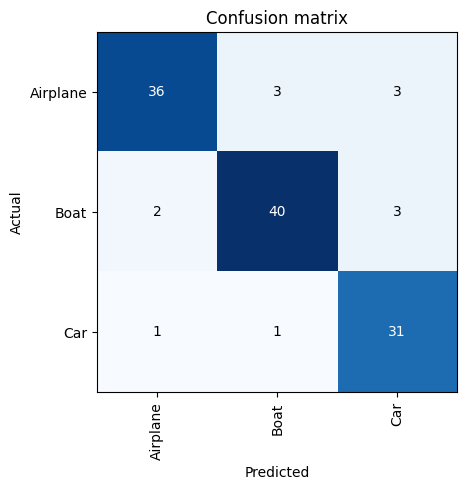

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

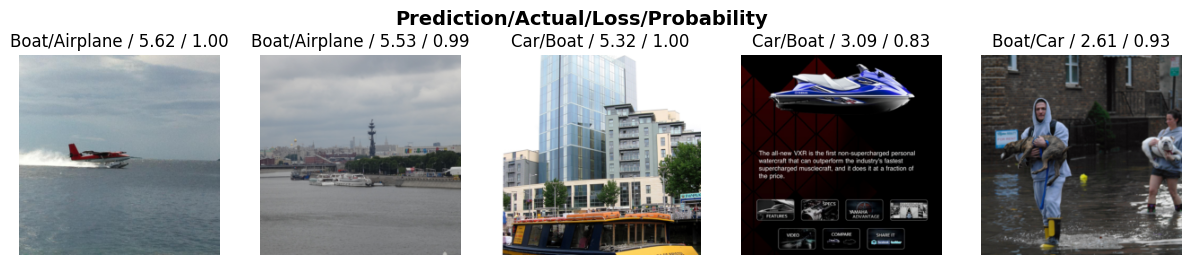

In [ ]:
# the largest errors of the model
interp.plot_top_losses(5, nrows=1)

#### Testing the Model

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Boat
Probability: 66.71%


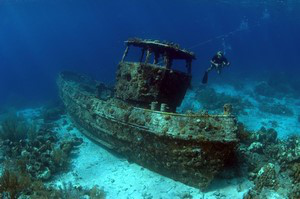

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {probs[pred_id]*100:.2f}%')
img

### Deploy Deep Learning Model → Product

We use `streamlit` to turn our model into a web application and deploy to `Streamlit Cloud`.

In [ ]:
# save trained model
learn.export("transport_class_model.pkl")

In [ ]:
# load the saved model
model = load_learner("/content/transport_class_model.pkl")

In [ ]:
# check the model
model.predict(img)

('Boat', tensor(1), tensor([3.3234e-01, 6.6709e-01, 5.7825e-04]))